In [4]:
# pip install -r requirements.txt
# pip install -U scikit-learn

from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from tqdm.notebook import tqdm
import os
import pandas as pd
import numpy as np

In [5]:
# add directory for both train & test set:
TRAIN_FOLDER='./images/train'
TEST_FOLDER='./images/validation'

In [6]:
def createDataFrame(directory):
    images=[]
    labels=[]
    # treat each folder like angry,sad as a label:
    for label in os.listdir(directory):
        for imageName in os.listdir(os.path.join(directory,label)):
            images.append(os.path.join(directory,label,imageName))
            labels.append(label)
        print(f"{label} completed")
    return images,labels

In [7]:
train=pd.DataFrame()
train['image'],train['label']=createDataFrame(TRAIN_FOLDER)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
# check your dataframe:
print(train)
# print(train['image'])

                                  image     label
0            ./images/train\angry\0.jpg     angry
1            ./images/train\angry\1.jpg     angry
2           ./images/train\angry\10.jpg     angry
3        ./images/train\angry\10002.jpg     angry
4        ./images/train\angry\10016.jpg     angry
...                                 ...       ...
28816  ./images/train\surprise\9969.jpg  surprise
28817  ./images/train\surprise\9985.jpg  surprise
28818  ./images/train\surprise\9990.jpg  surprise
28819  ./images/train\surprise\9992.jpg  surprise
28820  ./images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [8]:
test=pd.DataFrame()
test['image'],test['label']=createDataFrame(TEST_FOLDER)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
# check your dataframe:
print(test)

                                      image     label
0       ./images/validation\angry\10052.jpg     angry
1       ./images/validation\angry\10065.jpg     angry
2       ./images/validation\angry\10079.jpg     angry
3       ./images/validation\angry\10095.jpg     angry
4       ./images/validation\angry\10121.jpg     angry
...                                     ...       ...
7061  ./images/validation\surprise\9806.jpg  surprise
7062  ./images/validation\surprise\9830.jpg  surprise
7063  ./images/validation\surprise\9853.jpg  surprise
7064  ./images/validation\surprise\9878.jpg  surprise
7065   ./images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [9]:
# pick up each image & extract features:
def extractFeatures(images):
    features=[]
    for image in tqdm(images):      #tqdm:for fetching each image one by one
        img=load_img(image,color_mode='grayscale')
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)    #size of each image is 48*48 and 2D images so depth=1
    return features

In [10]:
train_features=extractFeatures(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features=extractFeatures(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train=train_features/255.0    #dividing by highest pixel value ie 255
x_test=test_features/255.0

In [13]:
# Supervised learning: providing labels:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [16]:
# we have 7 labels: angry,fear,disgust,happy,neutral,sad,surprise
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [18]:
#  create object of sequential:
model=Sequential()
# add all convolutional layers in the model:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))    #shape 48x48 and depth=1 for 2D image
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7,activation='softmax'))       #we have 7 labels so output class is 7

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))
# can stop when accuracy>75 ie around 0.75

Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.5619 - loss: 1.1461 - val_accuracy: 0.5896 - val_loss: 1.0795
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.5620 - loss: 1.1557 - val_accuracy: 0.5940 - val_loss: 1.0907
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2309s 10s/step - accuracy: 0.5675 - loss: 1.1395 - val_accuracy: 0.5945 - val_loss: 1.0815
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 202s 892ms/step - accuracy: 0.5713 - loss: 1.1302 - val_accuracy: 0.5945 - val_loss: 1.0850
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 215s 954ms/step - accuracy: 0.5655 - loss: 1.1427 - val_accuracy: 0.5967 - val_loss: 1.0839
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 210s 931ms/step - accuracy: 0.5682 - loss: 1.1327 - val_accuracy: 0.5960 - val_loss: 1.0795
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.5761 - loss: 1.1181

KeyboardInterrupt: 

In [60]:
model_json=model.to_json()
with open("emotionDetector.json","w") as json_file:
    json_file.write(model_json)
model.save("emotionDetector.h5")

In [61]:
from keras.models import model_from_json

In [62]:
json_file=open("emotionDetector.json","r")
model_json=json_file.read()
json_file.close()

In [63]:
model=model_from_json(model_json)
model.load_weights("emotionDetector.h5")

In [64]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [65]:
# function to extract feature from a single image
def feature_extract(image):
    image=load_img(image,color_mode='grayscale')
    feature=np.array(image)
    feature=feature.reshape(1,48,48,1)
    return feature/255.0

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 
#ie do not open another window & show here itself

In [69]:
image='./images/train/happy/24.jpg'
print("Original happy 24 image")
img=feature_extract(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print(f"Model predicted: {pred_label}")

Original happy 24 image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Model predicted: happy


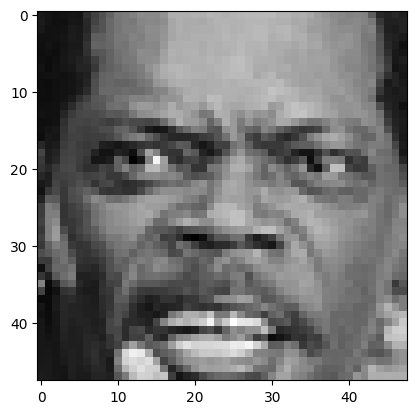

In [68]:
plt.imshow(img.reshape(48,48),cmap="gray")